In [3]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 上午11:12
# @Author  : play4fun
# @File    : 23.1.3 DFT 的性能优化.py
# @Software: PyCharm

"""
23.1.3 DFT 的性能优化.py:
"""
import cv2
import numpy as np

img = cv2.imread('img/messi5.jpg',0)
rows,cols = img.shape
#print rows,cols
# 342 548
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)
#print nrows, ncols
# 360 57

nimg = np.zeros((nrows,ncols))
nimg[:rows,:cols] = img

#或者
right = ncols - cols
bottom = nrows - rows
#just to avoid line breakup in PDF file
bordertype = cv2.BORDER_CONSTANT
nimg = cv2.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)

#现在我们看看 Numpy 的 现

%timeit fft1 = np.fft.fft2(img)
#10 loops, best of 3: 40.9 ms per loop
%timeit fft2 = np.fft.fft2(img,[nrows,ncols])
#100 loops, best of 3: 10.4 ms per loop

# 度提 了 4 倍。我们再看看 OpenCV 的 现
%timeit dft1= cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
#100 loops, best of 3: 13.5 ms per loop

%timeit dft2= cv2.dft(np.float32(nimg),flags=cv2.DFT_COMPLEX_OUTPUT)
#100 loops, best of 3: 3.11 ms per loop


5.79 ms ± 3.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.13 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.72 ms ± 7.92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.45 ms ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


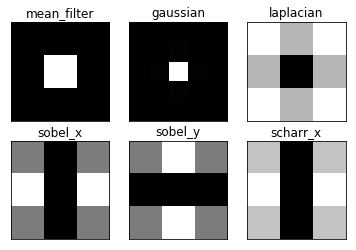

In [5]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 上午11:18
# @Author  : play4fun
# @File    : 23.1.4 为什么拉普拉斯算子是高通滤波器.py
# @Software: PyCharm

"""
23.1.4 为什么拉普拉斯算子是高通滤波器.py:
从图像中我们就可以看出每一个算子允    些信号。从 些信息中我 们就可以知  些是 HPF  是 LPF
"""
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3, 3))
# creating a guassian filter
x = cv2.getGaussianKernel(5, 10)

gaussian = x * x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10, 0, 10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# sobel in y direction
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# laplacian
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian', 'laplacian', 'sobel_x', 'sobel_y', 'scharr_x']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z) + 1) for z in fft_shift]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(mag_spectrum[i], cmap='gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()


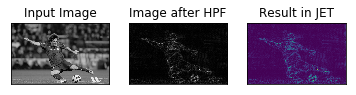

'\n如果你 察仔细的  尤其是最后一章 JET  色的图像 你会看到一些不 自然的东  如我用红色箭头标出的区域 。看上图  有些条带 的结构    成为振铃效应。\n 这是由于我们使用矩形窗口做掩模 成的。 个掩模  换 成正弦形状时就会出现 个  。所以一般我们不 用矩形窗口滤波。最好的  择是高斯窗口。\n\n'

In [6]:
# -*-coding:utf8-*-#
"""
create time:15-10-24 下午5:42

现在我们可以   域变换了 我们就可以在 域对图像  一些操 作了 例如  滤波和 建图像 DFT 的 变换 。比如我们可以使用一个 60x60 的矩形窗口对图像  
掩模操作从而去 低 分 。然后再使用函数 np.fft.ifftshift()    平移操作 所以现在直流分 又回到左上 了 左 后使用函数 np.ifft2()    FFT  变换。
同样又得到一堆复杂的数字 我们 可以对他们取绝对值 

"""
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/messi5.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
fshift[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
# 取绝对值
img_back = np.abs(img_back)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

'''
如果你 察仔细的  尤其是最后一章 JET  色的图像 你会看到一些不 自然的东  如我用红色箭头标出的区域 。看上图  有些条带 的结构    成为振铃效应。
 这是由于我们使用矩形窗口做掩模 成的。 个掩模  换 成正弦形状时就会出现 个  。所以一般我们不 用矩形窗口滤波。最好的  择是高斯窗口。

'''


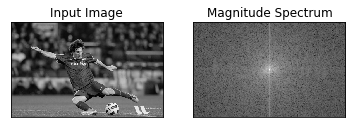

In [7]:
# -*-coding:utf8-*-#
"""
create time:15-10-24 下午5:42

函数 np.fft.fft2() 可以对信号   率  换  出结果是一个复杂的数组。
第一个参数是 入图像  求是灰 度格式。
第二个参数是可 的, 决定 出数组的大小。
 输出数组的大小和输入图像大小一样。如果输出结果比输入图像大 
  输入图像就需要在进行 FFT 前补0。如果输出结果比输入图像小的话   输入图像就会被切割。
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/messi5.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# 这里构建振幅图的公式没学过
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 上午10:59
# @Author  : play4fun
# @File    : OpenCV中的傅里叶变换-DFT.py
# @Software: PyCharm

"""
OpenCV中的傅里叶变换-DFT.py:
OpenCV 中相应的函数是 cv2.dft() 和 cv2.idft()。和前  出的结果 一样 但是是双通道的。
第一个通道是结果的实数部 分
第二个通道是结果的虚数部分。
输入图像  先 换成 np.float32 格式

使用函数 cv2.cartToPolar() 它会同时返回幅度和相位。

"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/messi5.jpg', 0)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
# @Time    : 2017/7/13 上午11:03
# @Author  : play4fun
# @File    : OpenCV中的傅里叶变换-逆DFT.py
# @Software: PyCharm

"""
OpenCV中的傅里叶变换-逆DFT.py:
在前 的 分我们实现了一个 HPF 高通滤波   现在我们来做 LPF 低通滤波 将高频分去除。其实就是对图像进行模糊操作。
 首先我们  构建一个掩模 与低 区域对应的地方 置为 1, 与  区域 对应的地方 置为 0。
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../data/messi5.jpg', 0)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# -*-coding:utf8-*-#
__author__ = 'play4fun'
"""
create time:15-10-24 下午5:46
原理
模板匹配是用来在一副大图中搜寻查找模版图像位置的方法。OpenCV 为 我们提供了函数 cv2.matchTemplate()。
和 2D 卷积一样 它也是用模板图像在输入图像 大图 上滑动 并在每一个位置对模板图像和与其对应的 输入图像的子区域  比较。
OpenCV 提供了几种不同的比较方法 细节 看 文档 。 
返回的结果是一个灰度图像 每一个像素值 示了此区域与模板的匹配 程度。
如果输入图像的大小是 WxH  
模板的大小是 wxh   输出的结果 的大小就是 W-w+1 H-h+1 。
当你得到这幅图之后 就可以使用函数 cv2.minMaxLoc() 来找到其中的最小值和最大值的位置了。
第一个值为矩形左上角的点 位置 
w h 为 moban 模板矩形的宽和 。
这个矩形就是 找到的模板区域了。
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../data/messi5.jpg', 0)
img2 = img.copy()
template = cv2.imread('../data/messi_face.jpg', 0)

w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()

    # exec 语句用来执行储存在字符串或文件中的 Python 语句。
    # 例如,我们可以在运行时生成一个包含 Python 代码的字符串,
    # 然后使用 exec 语句执行这些语句。
    # eval 语句用来计算存储在字符串中的有效 Python 表达式
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # 使用不同的比较方法,对结果的解释不同
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle('method: ' + meth)
    plt.show()


In [ ]:
'''
假如你的目标对 只在图像中出现了很多次怎么办呢
函数 cv.imMaxLoc() 只会给出最大值和最小值。此时 我们就 使用阈值了。
在下 的例子中我们 经典游戏 Mario 的一张截屏图片中找到其中的硬币

'''

import cv2
import numpy as np

# from matplotlib import pyplot as plt

img_rgb = cv2.imread('../data/mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('../data/mario_coin.png', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
print(len(loc))

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    print("rectangle 1")

# cv2.imwrite('res.png',img_rgb)
cv2.imshow("result", img_rgb)
cv2.waitKey(0)


In [ ]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 
img = cv2.imread('img/33.jpg',0)
f = np.fft.fft2(img) #傅里叶变换得到频谱，一般来说，低频分量模值最大 
fshift = np.fft.fftshift(f)#平移频谱到图像中央 # 将频谱转换成db 
magnitude_spectrum = 20*np.log(np.abs(fshift)) 
plt.subplot(321),plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray') 
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 
rows, cols = img.shape crow,ccol = rows//2 , cols//2 #设计一个高通滤波器对应0, 低频对应1 
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0 #平移逆变换 
f_ishift = np.fft.ifftshift(fshift) #傅里叶反变换 
img_back = np.fft.ifft2(f_ishift) # 取绝对值 
img_back = np.abs(img_back) 
plt.subplot(323),plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(324),plt.imshow(img_back, cmap = 'gray') 
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([]) 
plt.subplot(325),plt.imshow(img_back) 
plt.title('Result in JET'), plt.xticks([]), plt.yticks([]) 
plt.show() # fft in cv2 
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) 
dft_shift = np.fft.fftshift(dft) 
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 
plt.subplot(121),plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray') 
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


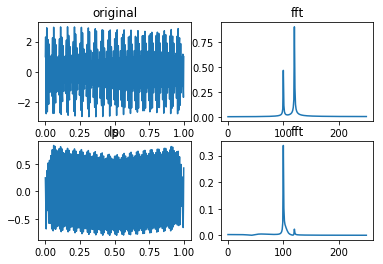

In [9]:
from scipy import signal 
import numpy as np 
import math 
import matplotlib.pyplot as pl 
def fft(yt, sampling_rate, fft_size=None): 
    if fft_size is None: 
        fft_size = len(yt) 
    yt = yt[:fft_size] 
    yf = abs(np.fft.rfft(yt)/fft_size) 
    freqs = np.linspace(0, 1.0*sampling_rate/2, 1.0*fft_size/2+1) 
    return freqs, yf
fs = 500 # sample rate 
nyq = fs * 0.5 # nyqust rate, the maximun rate that can be rebuild 
x = np.linspace(0,1,fs) # 1 second timeline 
yt = np.array([math.cos(100.0*2*math.pi*i) + 2.0*math.sin(120.0*2*math.pi*i) for i in x]) 
pl.subplot(221) 
pl.plot(x,yt) 
pl.title("original") 
freqs, yf = fft(yt, fs) 
pl.subplot(222) 
pl.plot(freqs, yf) 
pl.title("fft")
b, a = signal.butter(4, 110/nyq, "lowpass") # lowpass # 阶数；最大纹波允许低于通频带中的单位增益。以分贝表示，以正数表示；频率(Hz)/奈奎斯特频率（采样率*0.5） 
b, a = signal.cheby1(4, 5, 110/nyq, "lowpass") # lowpass 
yt = signal.filtfilt(b, a, yt) 
pl.subplot(223) 
pl.plot(x,yt) 
pl.title("lp") 
freqs, yf = fft(yt, fs) 
pl.subplot(224) 
pl.plot(freqs, yf) 
pl.title("fft") 
pl.show()


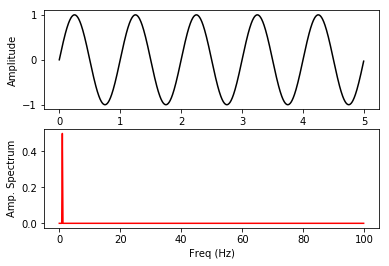

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
def show(ori_func, ft, sampling_period = 5): 
    n = len(ori_func) 
    interval = sampling_period / n # 绘制原始函数 
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') # 绘制变换后的函数 
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    nfft = abs(ft[range(int(n / 2))] / n ) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show() 
time = np.arange(0, 5, .005) 
x = np.sin(2 * np.pi * 1 * time) 
y = np.fft.fft(x) 
show(x, y)

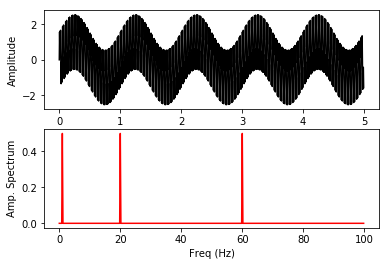

In [13]:
# 将其与频率为 20 和 60 的波叠加起来
x2 = np.sin(2 * np.pi * 20 * time) 
x3 = np.sin(2 * np.pi * 60 * time) 
x += x2 + x3 
y = np.fft.fft(x) 
show(x, y)

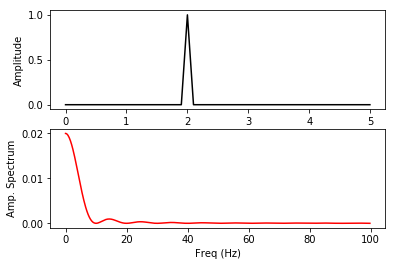

In [14]:
x = np.zeros(len(time)) 
x[380:400] = np.arange(0, 1, .05) 
x[400:420] = np.arange(1, 0, -.05) 
y = np.fft.fft(x) 
show(x, y) 

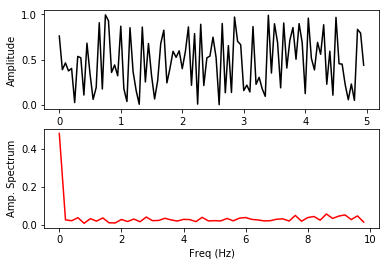

In [15]:
x = np.random.random(100) 
y = np.fft.fft(x) 
show(x, y) 

原理：
$$A_j = \sum_{m = 0} ^{n-1} a_m e^{-2\pi i\frac{mk}{n}}$$
逆变换
$$a_m = \frac{1}{n}\sum_{k=0}^{n-1}A_k e^{2\pi i\frac{mk}{n}}$$

In [4]:
x = np.random.random(500)
n = len(x) 
m = np.arange(n) 
k = m.reshape((n, 1)) 
M = np.exp(-2j * np.pi * k * m / n) 
y = np.dot(M, x) 
np.allclose(y, np.fft.fft(x)) # True '''
%timeit np.dot(np.exp(-2j * np.pi * np.arange(n).reshape((n, 1)) * np.arange(n) / n), x) 
#10 loops, best of 3: 18.5 ms per loop 
%timeit np.fft.fft(x) 
#100000 loops, best of 3: 10.9 µs per loop 


22.3 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.04 µs ± 21.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
# 傅里叶逆变换
M2 = np.exp(2j * np.pi * k * m / n) 
x2 = np.dot(y, M2) / n 
np.allclose(x, x2) 
# True 
np.allclose(x, np.fft.ifft(y)) 
# True

True

$$A_{kl} = \sum_{k=0}^{M-1}\sum_{l=0}^{N-1}a_{MN}e^{-2\pi i(\frac{mk}{M}+\frac{nl}{N})}$$
$$f(x) = \frac{a_0}{2}+\sum_{k=1}^\infty(a_k cos(kx)+b_k sin(kx))$$
$$\overline a + \widetilde b$$
$$\bar{a} + \tilde{b}$$
$$X[i] = \sum_{i=0}^{N/2}Re\overline{X}[k]\cos(2\pi ki/N)+\sum_{i=0}^{N/2}Re\overline{X}[k]\sin(2\pi ki/N)$$

In [ ]:
# 创建 10 个 0~9 随机整数的信号
a = np.random.randint(10, size = 10) 
a # array([7, 4, 9, 9, 6, 9, 2, 6, 8, 3]) 
a.mean() # 6.2999999999999998 
# 进行傅里叶变换 
A = np.fft.fft(a) 
A 
''' array([ 63.00000000 +0.00000000e+00j, -2.19098301 -6.74315233e+00j, 
-5.25328890 +4.02874005e+00j, -3.30901699 -2.40414157e+00j, 
13.75328890 -1.38757276e-01j, 1.00000000 -2.44249065e-15j, 
13.75328890 +1.38757276e-01j, -3.30901699 +2.40414157e+00j,
-5.25328890 -4.02874005e+00j, -2.19098301 +6.74315233e+00j]) '''
A[0] / 10 # (6.2999999999999998+0j) 
A[int(10 / 2)] # (1-2.4424906541753444e-15j) 
# A[0] 是 0 频率的项 
# A[1:n/2] 是正频率项 
# A[n/2 + 1: n] 是负频率项 
# 如果我们要把 0 频率项调整到中间 
# 可以调用 fft.fftshift 
np.fft.fftshift(A) 
''' array([ 1.00000000 -2.44249065e-15j, 13.75328890 +1.38757276e-01j,
-3.30901699 +2.40414157e+00j, -5.25328890 -4.02874005e+00j,
-2.19098301 +6.74315233e+00j, 63.00000000 +0.00000000e+00j,
-2.19098301 -6.74315233e+00j, -5.25328890 +4.02874005e+00j,
-3.30901699 -2.40414157e+00j, 13.75328890 -1.38757276e-01j]) '''
# fft2 用于二维，fftn 用于多维 
x = np.random.random(24) 
x.shape = 2,12 
y2 = np.fft.fft2(x) 
x.shape = 1,2,12 
y3 = np.fft.fftn(x, axes = (1, 2))
np.allclose(y2, y3)
# True 


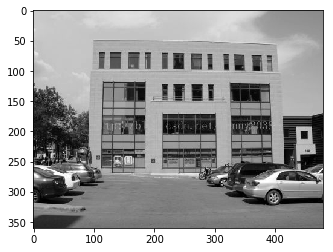

In [6]:
from matplotlib import image
# 将上面的图片保存为 scientist.png 
# 并读入 
img = image.imread('./building.jpg') # 将图片转换为灰度图 
# 每个像素是 0.21R + 0.72G + 0.07B 
gray_img = np.dot(img[:,:,:3], [.21, .72, .07]) 
gray_img.shape # (317L, 661L) 
plt.imshow(gray_img, cmap = plt.get_cmap('gray')) 
# <matplotlib.image.AxesImage at 0xa6165c0> 
plt.show() 


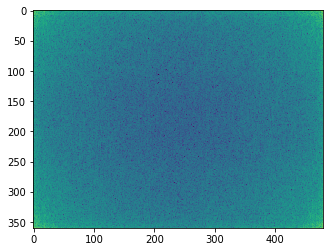

In [7]:
# fft2 是二维数组的傅里叶变换 
# 将空域转换为频域
fft = np.fft.fft2(gray_img) 
amp_spectrum = np.abs(fft) 
plt.imshow(np.log(amp_spectrum)) 
# <matplotlib.image.AxesImage at 0xcdeff60> 
plt.show() 


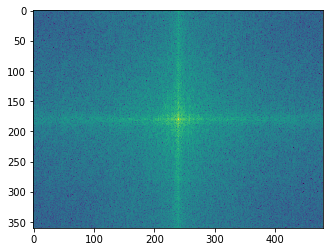

In [8]:
fft_shift = np.fft.fftshift(fft) 
plt.imshow(np.log(np.abs(fft_shift))) 
# <matplotlib.image.AxesImage at 0xd201dd8> 
plt.show() 

In [10]:
# 放大图像
# 我们向 fft_shift 插入零频率，将其尺寸扩大两倍 
m, n = fft_shift.shape 
b = np.zeros((int(m / 2), n)) 
c = np.zeros((2 * m - 1, int(n / 2))) 
fft_shift = np.concatenate((b, fft_shift, b), axis = 0) 
fft_shift = np.concatenate((c, fft_shift, c), axis = 1) 
# 然后再转换回去 
ifft = np.fft.ifft2(np.fft.ifftshift(fft_shift)) 
ifft.shape 
# (633L, 1321L) 
ifft = np.real(ifft)
plt.imshow(ifft, cmap = plt.get_cmap('gray')) 
# <matplotlib.image.AxesImage at 0xf9a0f98> 
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
%%图像的傅里叶变换%%
imA=imread('rice.tif','tif'); %读取图像
imB=imread('lena.tiff','tif');
subplot(2,3,1);
imshow(imA);
title('原图像A');
subplot(2,3,2);
imshow(imB);
title('原图像B');
FA=fft2(imA);%对图像进行傅里叶变换
FB=fft2(imB);
fA=fftshift(FA); %对图像频谱进行移动，是0频率点在中心
fB=fftshift(FB);
sA=log(abs(fA));%获得傅里叶变换的幅度谱
sB=log(abs(fB));
phA=log(angle(fA)*180/pi);%获得傅里叶变换的相位谱
phB=log(angle(fB)*180/pi);
subplot(2,3,3);
imshow(sA,[]); %显示图像的度谱，参数与[]是为了将sA的值线形拉伸
title('图像A的傅里叶变换幅度谱');
subplot(2,3,4);
imshow(phA,[]); %显示图像傅里叶变换的相位谱
title('图像A傅里叶变换的相位谱');
subplot(2,3,5);
imshow(sB,[])
title('图像B的傅里叶变换幅度谱');
subplot(2,3,6);
imshow(phB,[]);
title('图像B傅里叶变换的相位谱');
A=ifft2(FA);%傅里叶反变换
B=ifft2(FB);
figure
subplot(1,2,1);
imshow(A,[]);
title('傅里叶反变换得到的A图像');
subplot(1,2,2);
imshow(B,[]);
title('傅里叶反变换的到的B图像');

In [ ]:
#coding=utf-8

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
img=cv2.imread('test1-angle.jpg',cv2.IMREAD_GRAYSCALE) 
# f = np.fft.fft2(img)
# fshift = np.fft.fftshift(f)
# #取绝对值：将复数变化成实数
# #取对数的目的为了将数据变化到较小的范围（比如0-255）
# s1 = np.log(np.abs(f))
# s2 = np.log(np.abs(fshift))
# print(np.shape(s1))
# print(s1[0:20,0:20])
# cv2.imshow('s1',np.array(s1,dtype=int))
# cv2.imshow('s2',s2)
# cv2.waitKey()
# plt.subplot(321),plt.imshow(s1,'gray'),plt.title('original')
# plt.subplot(322),plt.imshow(s2,'gray'),plt.title('center')
# ph_f = np.angle(f)
# ph_fshift = np.angle(fshift)
# # print(ph_f)
# # print(ph_fshift)
# plt.subplot(323),plt.imshow(ph_f,'gray'),plt.title('original')
# plt.subplot(324),plt.imshow(ph_fshift,'gray'),plt.title('center')
#
# # 逆变换
# f1shift = np.fft.ifftshift(fshift)
# img_back = np.fft.ifft2(f1shift)
# # 出来的是复数，无法显示
# img_back = np.abs(img_back)
# plt.subplot(325), plt.imshow(img_back, 'gray'), plt.title('img back')
# plt.show()
plt.subplot(121), plt.imshow(img,'gray'), plt.title('origial') 
plt.xticks([]),plt.yticks([]) #--------------------------------
rows,cols = img.shape 
# mask = np.ones(img.shape,np.uint8)
# mask[rows/2-30:rows/2+30,cols/2-30:cols/2+30] = 0 #高通滤波
# mask = np.zeros(img.shape,np.uint8)
# mask[rows/2-80:rows/2+80,cols/2-80:cols/2+80] = 1 #低通滤波
#--------------------------------
#--------------------------------理想的带通滤波器
rows,cols = img.shape 
mask1 = np.ones(img.shape,np.uint8)
mask1[rows/2-8:rows/2+8,cols/2-8:cols/2+8] = 0
mask2 = np.zeros(img.shape,np.uint8) 
mask2[rows/2-80:rows/2+80,cols/2-80:cols/2+80] = 1
mask = mask1*mask2 #--------------------------------
f1 = np.fft.fft2(img) 
f1shift = np.fft.fftshift(f1) 
f1shift = f1shift*mask 
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift) #出来的是复数，无法显示
img_new = np.abs(img_new) #调整大小范围便于显示
img_new = 255-(img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])
plt.show()


- [on2way](https://blog.csdn.net/on2way/article/details/46981825). 
- [zhihu](https://www.zhihu.com/question/54918332/answer/142137732) 
- [qq](https://blog.csdn.net/qq_22904277/article/details/53316415) 
- [u011](https://blog.csdn.net/u011808673/article/details/83176191) 
- [wizardforce](https://blog.csdn.net/wizardforcel/article/details/73277303) 